IS 445 - ACG/ACU: Data Visualization - Fall 2023
===============================================
Assignment 2
-----------------------
**Student: Christopher Mujjabi**

**Date: September 23, 2023**

### Instructions
#### Using one of the tools that we have discussed, construct a visualization of the Illinois Building Inventory that communicates the following information:

- Relationship between the year acquired and the year constructed
- Total square footage as a function of congressional district
- Average square footage per floor as a function of congressional district
- Square footage for the five most common departments as a function of year

Each component will be worth 5 points and must be a completely communicative visualization -- including labels and a one paragraph writeup of successes and shortcomings in your approach. Submit a notebook or a set of JSON gists to Moodle. All source code must be in these files.



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.transforms as transforms

#### Importing the dataset and reassigning missing values

In [144]:
Data = pd.read_csv("building_inventory.csv",
                   na_values={'Year Acquired': 0,
                              'Year Constructed': 0,
                              'Square Footage': 0,
                              'Congress Dist': 0,
                              'Total Floors': 0}
                   )

In [145]:
Data.describe()

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
count,8862.000000,8699.000000,8862.000000,8862.000000,8597.000000,8573.000000,8.805000e+03,8854.000000,8862.000000,8862.000000
mean,61821.076845,13.655248,92.303318,46.408599,1972.243573,1970.391928,1.155032e+04,1.637565,1.449334,0.161589
std,1095.203357,3.630482,23.568457,11.781038,27.549380,29.326256,3.828480e+04,1.537510,1.286898,0.392717
min,1235.000000,1.000000,0.000000,0.000000,1753.000000,1753.000000,9.000000e+00,1.000000,0.000000,0.000000
25%,61105.000000,12.000000,79.000000,40.000000,1959.000000,1957.000000,2.400000e+02,1.000000,1.000000,0.000000
50%,62023.000000,14.000000,97.000000,49.000000,1976.000000,1975.000000,1.664000e+03,1.000000,1.000000,0.000000
75%,62650.000000,16.000000,110.000000,55.000000,1993.000000,1991.000000,6.528000e+03,2.000000,1.000000,0.000000
max,68297.000000,18.000000,119.000000,60.000000,2019.000000,2019.000000,1.200000e+06,31.000000,30.000000,4.000000


#### 1. Relationship between the year acquired and the year constructed

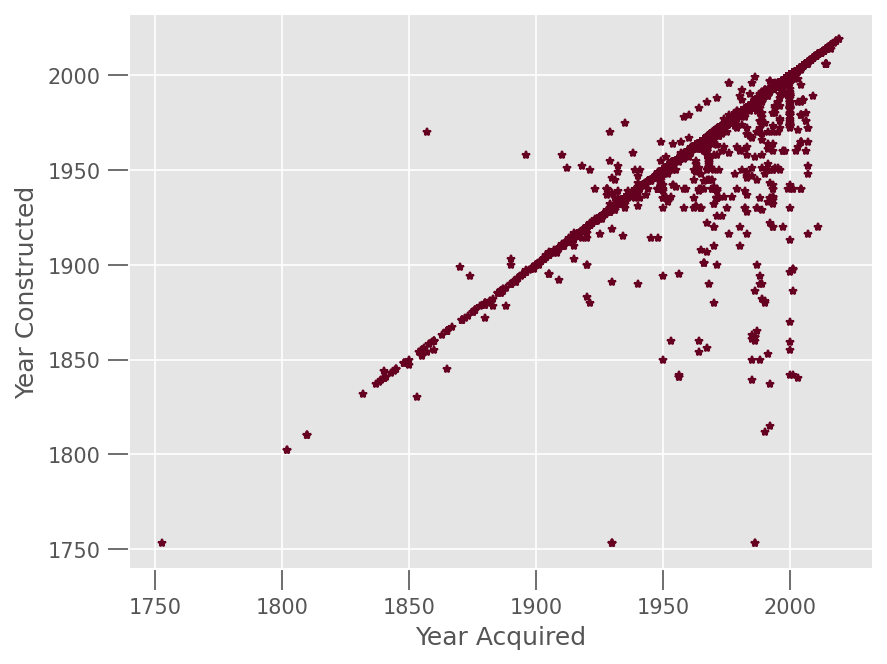

In [358]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(Data['Year Acquired'], Data['Year Constructed'],
            linestyle='', c='#650021', marker='*', markersize=4)
    ax.set_ylabel("Year Constructed")
    ax.set_xlabel("Year Acquired")
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="both", which="major", labelsize=10, size=10)

The Graph above shows a positive correlation between the year the buldings were constructed and the year they were acquired. I sucessfully displayed the visualization as a scatter plot, which is the best visualization to display relationships between 2 variables. 

It was easy for me t import the data, and clean the data (manage missing data in each column) before using it to construct any visualizations. Also, I was able to select the specific variables from the dataset and name them correctly on the scatterplot. I did not experience any shortcomings in this case. 

#### 2. Total square footage as a function of congressional district

In [115]:
Footage_Per_Dist = Data.groupby("Congress Dist")["Square Footage"].sum()

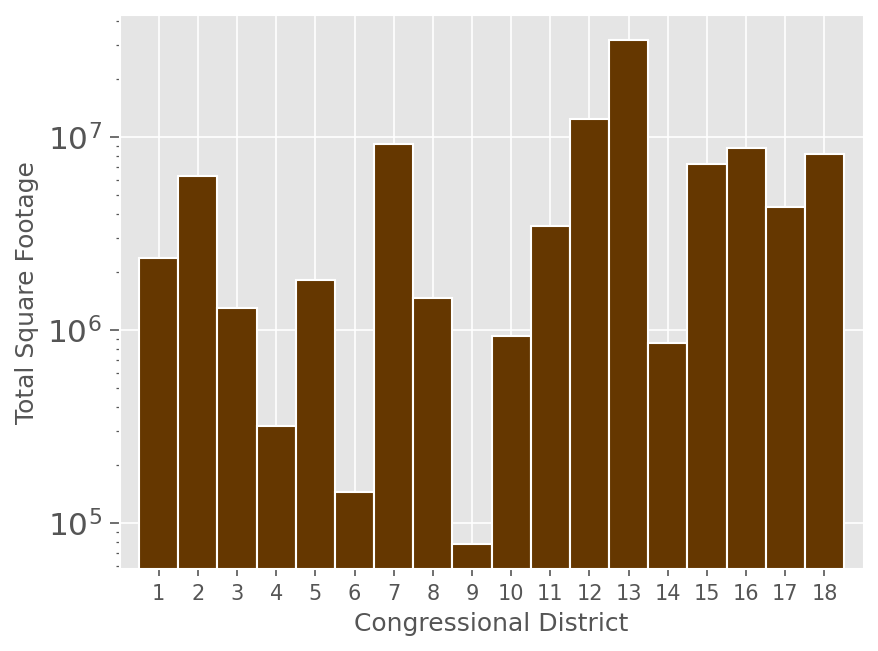

In [199]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.bar(Footage_Per_Dist.index, Footage_Per_Dist,  width=1,
           edgecolor="white", linewidth=1, color='#653700')
    ax.set(xlim=(0, 19), xticks=np.arange(0, 19))
    ax.set_yscale("log")
    ax.set_xscale("linear")
    ax.set_ylabel("Total Square Footage")
    ax.set_xlabel("Congressional District")
    ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18])
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="y", which="major", labelsize=15, size=5)
    ax.tick_params(axis="x", which="minor", labelsize=15, size=5)

plt.show()

The graph above shows that congressional district 13 had the highest number of total square footage while congrestional district 9 had the lowest square footage, compared to the rest of the districts. Buildings under district 0 where disregarded or considered unassigned to a district, hence only plotting data from district 1 to 18. 

It successfully displayed the data using a bar graph, which made it easy to visualize the distribution of square footage across the different congressional districts. Axis labeling,color setting, and setting the axis scale (particularly the y-axis) was easy to do since we saw this in class. 

#### 3. Average square footage per floor as a function of congressional district

In [153]:
Footage_Per_Dist = Data.groupby("Congress Dist")["Square Footage"].sum()
Footage_Per_Dist

Congress Dist
1.0      2351762.0
2.0      6285684.0
3.0      1293687.0
4.0       317741.0
5.0      1809022.0
6.0       145659.0
7.0      9211651.0
8.0      1461548.0
9.0        77978.0
10.0      929267.0
11.0     3467894.0
12.0    12444775.0
13.0    31849251.0
14.0      857108.0
15.0     7209934.0
16.0     8725880.0
17.0     4347743.0
18.0     8120838.0
Name: Square Footage, dtype: float64

In [152]:
Floors_Per_Dist = Data.groupby("Congress Dist")["Total Floors"].sum()
Floors_Per_Dist

Congress Dist
1.0      134.0
2.0      647.0
3.0       72.0
4.0       21.0
5.0      113.0
6.0       28.0
7.0      517.0
8.0      312.0
9.0       11.0
10.0     213.0
11.0     411.0
12.0    2339.0
13.0    2896.0
14.0     319.0
15.0    1872.0
16.0    1654.0
17.0     924.0
18.0    1800.0
Name: Total Floors, dtype: float64

In [155]:
average_footage_floor = Footage_Per_Dist/Floors_Per_Dist
average_footage_floor

Congress Dist
1.0     17550.462687
2.0      9715.122102
3.0     17967.875000
4.0     15130.523810
5.0     16009.044248
6.0      5202.107143
7.0     17817.506770
8.0      4684.448718
9.0      7088.909091
10.0     4362.755869
11.0     8437.698297
12.0     5320.553655
13.0    10997.669544
14.0     2686.858934
15.0     3851.460470
16.0     5275.622733
17.0     4705.349567
18.0     4511.576667
dtype: float64

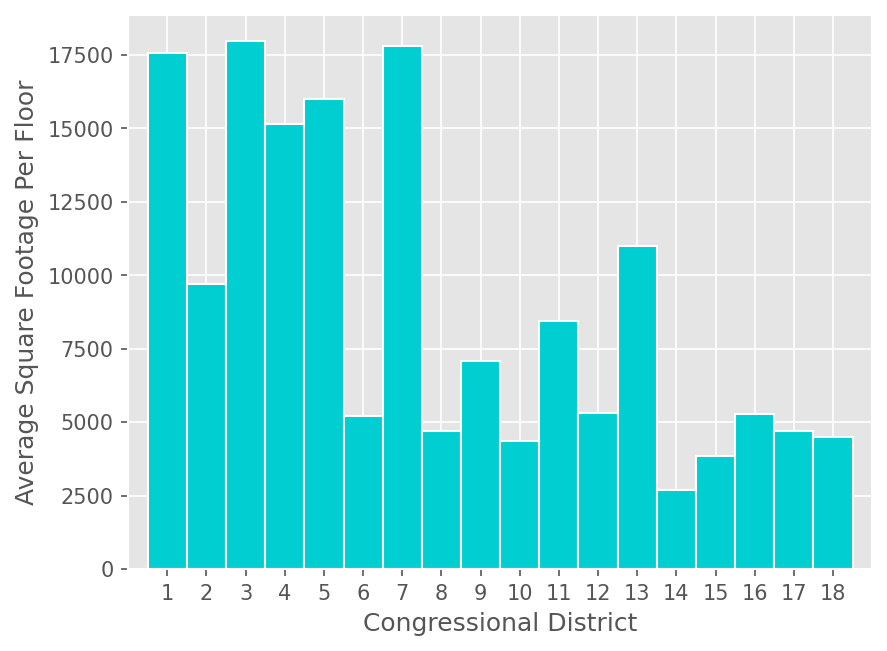

In [206]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(dpi=150)
    ax.bar(average_footage_floor.index, average_footage_floor,  width=1,
           edgecolor="white", linewidth=1, color='darkturquoise')
    ax.set(xlim=(0, 18), xticks=np.arange(0, 20))
    ax.set_yscale("linear")
    ax.set_xscale("linear")
    ax.set_ylabel("Average Square Footage Per Floor")
    ax.set_xlabel("Congressional District")
    ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18])
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    ax.tick_params(axis="y", which="minor", labelsize=15, size=5)
    ax.tick_params(axis="x", which="minor", labelsize=15, size=5)
plt.show()

The the bar graph above represents the average square footage per floor in each of the 18 congressional districts. District 3, 7 and 1 have the highest average square footage per floor, while district 14 has the lowest. I decided to use a bargraph because it can clearly display the distribution of square footage across districts. 

I would have liked to include error bars at each bar to show the variability in building sizes. But I couldnt figure out how to add this feature to my bar graph. 

#### 4. Square footage for the five most common departments as a function of year

In [226]:
# First, I wanted to find the the 5 most common departments in the dataset
Top_5_Departments = Data['Agency Name'].value_counts().head(5)
Top_5_Departments

Agency Name
Department of Natural Resources    3223
Department of Corrections          1428
Department of Transportation       1137
Department of Human Services        617
University of Illinois              525
Name: count, dtype: int64

In [312]:
# Then I created a separate dataset with only the selected 5 common departments I found in the previous step.

Common_Departments = ['Department of Natural Resources', 'Department of Corrections',
                      'Department of Transportation', 'Department of Human Services', 'University of Illinois']
Common_Departments = Data[Data['Agency Name'].isin(Common_Departments)]

In [313]:
# Then i created 5 different subsets, separating each of the 5 departments

Natural_Resources = Common_Departments[Common_Departments['Agency Name']
                                       == 'Department of Natural Resources']
Corrections = Common_Departments[Common_Departments['Agency Name']
                                 == 'Department of Corrections']
Transportation = Common_Departments[Common_Departments['Agency Name']
                                    == 'Department of Transportation']
Human_Services = Common_Departments[Common_Departments['Agency Name']
                                    == 'Department of Human Services']
UIUC = Common_Departments[Common_Departments['Agency Name']
                          == 'University of Illinois']

In [328]:
# Then I calculated the culumative square footage of each department over the years (year acquired)

Natural_Resources_per_year = Natural_Resources.groupby("Year Acquired")[
    "Square Footage"].sum()
Natural_Resources_cumulative = Natural_Resources_per_year.cumsum()

Corrections_per_year = Corrections.groupby(
    "Year Acquired")["Square Footage"].sum()
Corrections_cumulative = Corrections_per_year.cumsum()

Transportation_per_year = Transportation.groupby(
    "Year Acquired")["Square Footage"].sum()
Transportation_cumulative = Transportation_per_year.cumsum()

Human_Services_Per_year = Human_Services.groupby(
    "Year Acquired")["Square Footage"].sum()
Human_Services_cumulative = Human_Services_Per_year.cumsum()

UIUC_per_year = UIUC.groupby("Year Acquired")["Square Footage"].sum()
UIUC_cumulative = UIUC_per_year.cumsum()

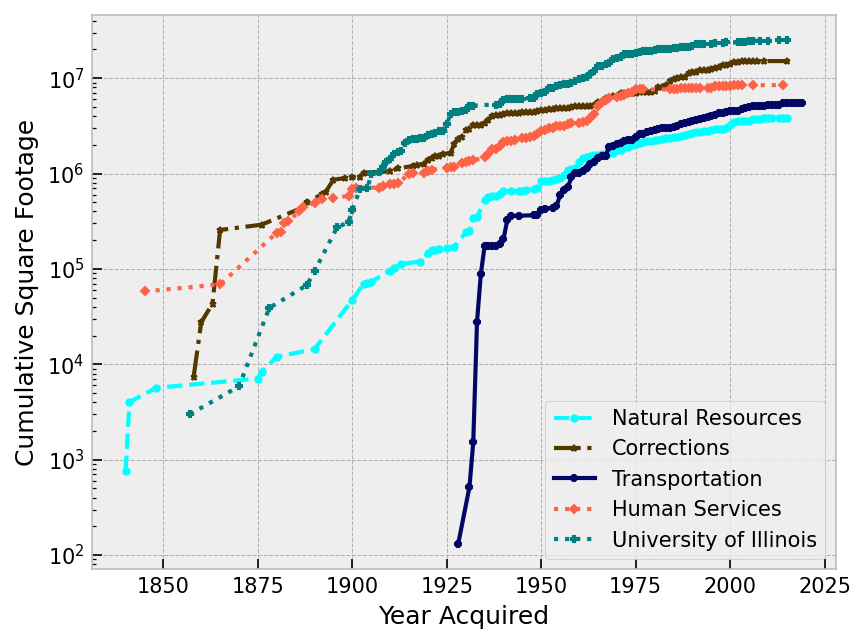

In [352]:
# Then I plotted each department, individually on the same plot.

with plt.style.context("bmh"):
    fig, ax = plt.subplots(dpi=150)
    plt.plot(Natural_Resources_cumulative.index, Natural_Resources_cumulative,
             label='Natural Resources', linestyle='--', c='#00FFFF', marker='o', markersize=3)
    plt.plot(Corrections_cumulative.index, Corrections_cumulative,
             label='Corrections', linestyle='-.', c='#553700', marker='*', markersize=3)
    plt.plot(Transportation_cumulative.index, Transportation_cumulative,
             label='Transportation', linestyle='-', c='#030764', marker='8', markersize=3)
    plt.plot(Human_Services_cumulative.index, Human_Services_cumulative,
             label='Human Services', linestyle=':', c='#FF6347', marker='D', markersize=3)
    plt.plot(UIUC_cumulative.index, UIUC_cumulative,  label='University of Illinois',
             linestyle=':', c='#008080', marker='P', markersize=3)
    plt.xlabel('Year Acquired')
    plt.ylabel('Cumulative Square Footage')
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    my_ticks = ax.xaxis.get_ticklabels()
    fp = my_ticks[0].properties()['fontproperties']
    plt.tick_params(axis="y", which="major", labelsize=10, size=5)
    plt.tick_params(axis="x", which="major", labelsize=10, size=5)

    plt.show()

The graph above shows the culumulative square footage for the five common departments over the years. We see that The university of Illinois has the highest cumulative square footage while the department of natural resources has the lowest, yet it was the first to acquire buildings before any department. The department of transportation has acquired more square footage than the department of natural resources, even though it was started owing buildings a century later. 

This visualization was by far the hardest to pull off, given the complexity of steps taken to obtain it. The hardest part for me was figuring out how to plot all the 5 departments on the same graph. Initially, I had disected the dataset in one subset containing only the 5 departments. However, I couldnt figure out how to present all of the departments on one single graph since the code i was using was plotting each department individually. Therefore, I decided to disect the dataset further into 5 subsets and I was able to call each department using the plt.plot() five times, hence resulting into the visualization above. 